In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_zomato.csv')

In [3]:
df.dropna(subset=['name'], inplace=True)
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['rest_type'] = df['rest_type'].fillna(df['rest_type'].mode()[0])

In [4]:
df.isnull().sum()

name             0
location         0
online_order     0
book_table       0
cuisines         0
rate             0
costof2plates    0
type_mode        0
rest_type        0
votes            0
dtype: int64

In [5]:
df.head()

,name,location,online_order,book_table,cuisines,rate,costof2plates,type_mode,rest_type,votes
0,Jalsa,Banashankari,Yes,Yes,North Indian Mughlai Chinese,4.1,800.0,Buffet,Casual Dining,775.0
1,Spice Elephant,Banashankari,Yes,No,others,4.1,800.0,Buffet,Casual Dining,787.0
2,San Churro Cafe,Banashankari,Yes,No,others,3.8,800.0,Buffet,"Cafe, Casual Dining",918.0
3,Addhuri Udupi Bhojana,Banashankari,No,No,South Indian North Indian,3.7,300.0,Buffet,Quick Bites,88.0
4,Grand Village,Basavanagudi,No,No,others,3.8,600.0,Buffet,Casual Dining,166.0


# SCENIO
##### now lets a scenio, now a customer has to open a restaurant, and he asking one of the data analyst a asolution for this. So, as a data analyst we have to give him a location where he can open a restaurant. 

# univariant analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),
 <a list of 70 Text major ticklabel objects>)

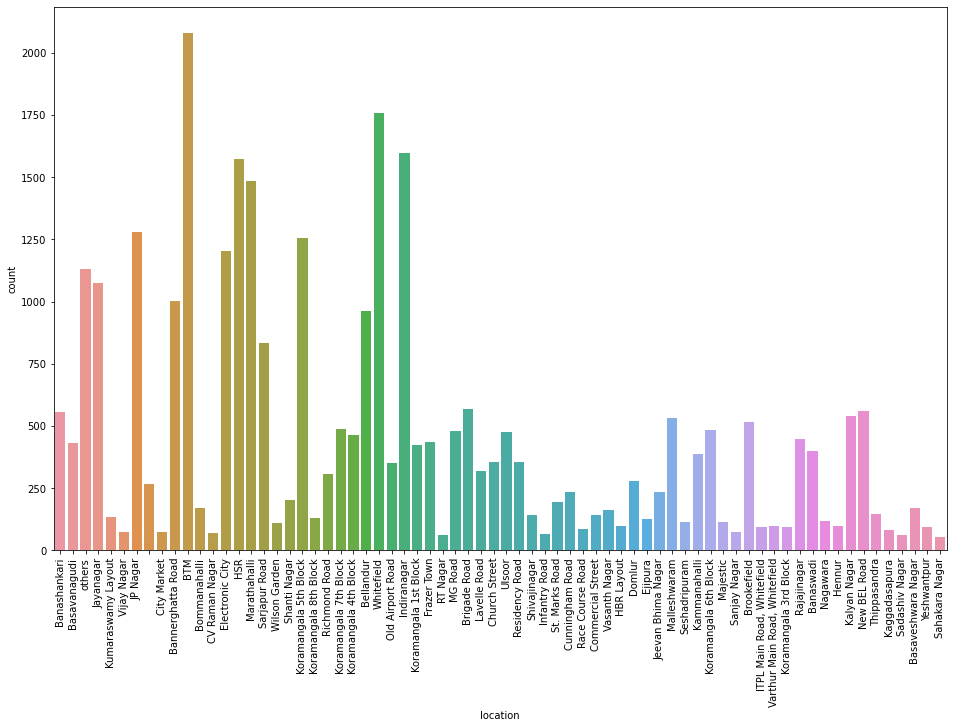

In [6]:
# lets analyze location column
plt.figure(figsize=(16,10))
ax = sns.countplot(df['location'])
plt.xticks(rotation=90)

insight: by viewing the graph i got to known that if a customer has to open a restaurant he should not open a restaurant at BTM
because BTM has already more restaturant, he might face a loss in his business

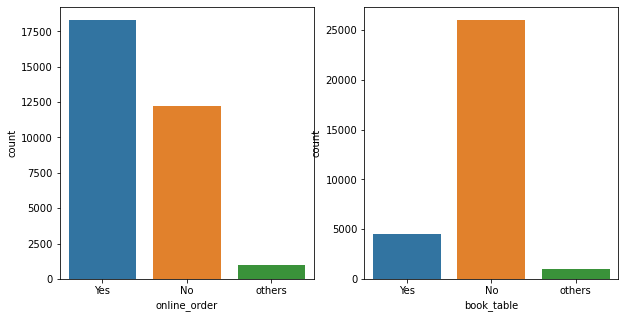

In [7]:
# lets analyze location column
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(df['online_order'], ax = axes[0])


sns.countplot(df['book_table'], ax = axes[1])


In [8]:
# online_order is on more demand as compared to physical visiting restaurant, and only few has booked the table. 
# yes, this is true, as people choose online_order, booking table becomes less.  

In [45]:
chi = df[['online_order','book_table']]

TypeError: 'int' object is not subscriptable

In [12]:
from scipy.stats import chi2_contingency

<scipy.stats._continuous_distns.chi2_gen object at 0x000001E95B0593D0> 0.0 4 [[10114.8294608  15101.71014677   808.46039243]
 [ 1765.28551051  2635.61834723   141.09614226]
 [  380.88502869   568.67150601    30.44346531]]


In [14]:
df_association = pd.crosstab(df['book_table'], df['online_order'])
print(df_association)

online_order     No    Yes  others
book_table                        
No            10272  15753       0
Yes            1989   2553       0
others            0      0     980


In [15]:
# observed values
observed_values = df_association.values
print('observed values:-\n', observed_values)

observed values:-
 [[10272 15753     0]
 [ 1989  2553     0]
 [    0     0   980]]


In [30]:

val = stats.chi2_contingency(df_association)

In [31]:
val

(31578.028001690207,
 0.0,
 4,
 array([[10114.8294608 , 15101.71014677,   808.46039243],
        [ 1765.28551051,  2635.61834723,   141.09614226],
        [  380.88502869,   568.67150601,    30.44346531]]))

In [32]:
expected_val = val[3]
expected_val

array([[10114.8294608 , 15101.71014677,   808.46039243],
       [ 1765.28551051,  2635.61834723,   141.09614226],
       [  380.88502869,   568.67150601,    30.44346531]])

In [33]:
# to calculate df(degree of freedom)
no_rows = len(df_association.iloc[0:2,0])
no_columns = len(df_association.iloc[0,0:2])
df = (no_rows-1)*(no_columns-1)
print('degree of freedom = ', df)
alpha = 0.05

degree of freedom =  1


In [34]:
chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_val)])
# this returns two values, row sum and have to add those values
chi_square_statistics = chi_square[0] + chi_square[1]
chi_square_statistics

1011.0280016902077

In [35]:
# critical value nothing but tabular value(which we see in table chart)
# for this we need q value and degree of freedom

critical_value = chi2.ppf(q=1-alpha,df=df)
print(critical_value)

3.841458820694124


In [40]:
# p value 

p_value = 1-chi2.cdf(x = chi_square_statistics, df = df)
print('p_value = ', p_value)
print('significance level = ', alpha)
print('degree of freedom =', df )


p_value =  0.0
significance level =  0.05
degree of freedom = 1


In [41]:
if chi_square_statistics >= critical_value: 
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")
    


we reject null hypothesis


In [ ]:
# ho= there is no relation (null hypo)
# h1 = there is  relation (alternate hypo)
# calculated > critical, we reject null hypo and accept alternate hypo 